<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2020gajumarutugaru/2020_0415Friston_in_detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Date: 2020-0415
- Author: 浅川伸一
- Note: かじゅまるつがる松本先生のモデルをフリストンの自由エネルギー原理で説明する
---

<img src="https://camo.githubusercontent.com/52feade06f2fecbf006889a904d221e6a730c194/68747470733a2f2f636f6c61622e72657365617263682e676f6f676c652e636f6d2f6173736574732f636f6c61622d62616467652e737667">

In [0]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## 前提知識 エントロピー

- エントロピーには 2 つの分野それぞれ定義されている概念です。それぞれ熱力学的エントロピーと情報論的エントロピーと呼ばれます。
熱力学的エントロピーは，しばしば **乱雑さ** の度合い （熱力学の第2法則），情報論的エントロピーは **情報量** と関連します。
両者とも数式では完全に一致します: 
$$
S = - \sum_i p(x_i) \log p(x_i) dx \hspace{2em} \left(= - \int x \log(x)\;dx\right) \hspace{3em}\text{(1)}
$$

上式で マイナスが付いている理由は 確率変数の値域は $[0,1]$ であるため，その対数変換した値は $\log(x)\le0$ となるからです。
負になると直感的に意味が取り難いので正の値にするために付加されます。
そもそも確率変数 $x$ の期待値とは変数が離散的であれ連続的であれ次式で与えられます:

$$
E[X] = \sum_i x_i p(x_i), \hspace{2em} \left(= \int x f(x)\;dx\right)
$$

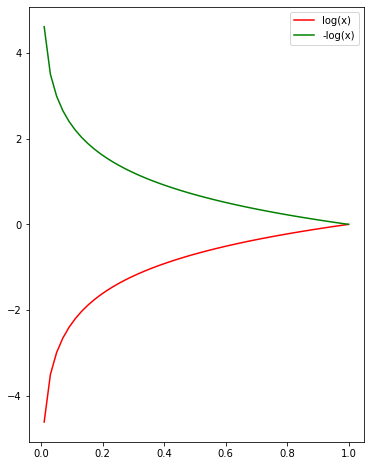

In [0]:
plt.figure(figsize=(6,8))
x = np.linspace(0.01,1)
plt.plot(x, np.log(x), 'r', label="log(x)")
plt.plot(x, -np.log(x), 'g', label="-log(x)")
plt.legend()


$p(X_i)$ でも $f(x)$ でも確率（密度関数）を表すと考えればエントロピーとは確率密度関数の対数の期待値，すなわち (1) 式で 確率密度関数を対数変換した
量であることが分かります。

# カルバックライブラー情報量

- エントロピーを前提知識としてカルバック=ライブラーの情報量，あるいはカルバック=ライブラーのダイバージェンスを定義します。
カルバック=ライブラーの距離と言う場合もあります。以後 KL ダイバージェンスと表記します。
- フリストンの論文中では $D(q\vert\vert p)$ などと表記されている部分になります。
- KL ダイバージェンスは距離と見なすこともできますが，大きなそして重要な違いがあります。それは，どちらから距離を眺めるかによって値が異なることです $D(a||b) \ne D(b||a)$ 
- KL ダイバージェンスとは，二つの確率分布の距離を与える量になります。
- 距離として頻用される定義はユークリッド距離 $\sum_i\left(q_i-p_i\right)^2$ が用いられます。
- ユークリッド距離ではどの次元の値も同列に扱われます。
- ところが KL ダイバージェンスでは確率密度関数の値が小さい領域と大きい領域とでは差を付けることを考えます。
- 加えて，**ユークリッド距離は 2 者の差で定義される量** であるのに対して，**KL ダイバージェンスは両者の比で表される量** であることが異なります
- $\displaystyle-\log(x)=\log\left(\frac{1}{x}\right)$ であることに注意すれば，以下の 2 つの式は同じであることが分かります：
$$
D(p||q) = - \int p(x) \log\left[\frac{q(x)}{p(x)}\right]dx \hspace{3em}(3)
$$

$$
D(p||q) = \int p(x) \log\left[\frac{p(x)}{q(x)}\right]dx \hspace{3em}\text{(4)}
$$

- KL ダイバージェンスのポイントは，$KL(p\vert\vert q)$ では $p$ から見た場合の距離であること，
すなわち確率密度関数 p の値が 0 に近い点 $p\simeq0$ では $q$ の値が大きくても考慮されません。

文献によっては KL ダイバージェンスを上式いずれかで定義していています。エントロピーの定義式

---

## フリストンの自由エネルギー原理による ASD 松本先生モデルの解題

- 以上の準備を元にして，松本先生の疑問に答える（という名目で，真の目的は自分の考えを整理すること）ことを試みます。
- 今，下から上がってくる感覚入力信号 $x$ を用いて認識モデル $p(x) = z$ が仮説 $z$ を形成すると考えます。
- $q(z)=x$ は生成モデルで，トップダウン処理により下からの感覚入力を推論します。

復習を兼ねてフリストンの自由エネルギー原理の概略を以下に再掲します。
<div align="center">
    <img src="https://shinasakawa.github.io/assets/2010Friston_box1_ja.svg" style="width:74%"><br/>
</div>

上図 B に出てくる式の説明ですが，
$$
F=-\left<\ln p(\tilde{s},\vartheta\vert m)\right>_q +  \left<\ln q(\vartheta\vert\mu)\right>_q
$$
において，左辺第一項 すなわち
$$
\left<\ln p(\tilde{s},\vartheta\vert m)\right>_q
$$
は，エントロピーの定義式です。$\left<\right>$ は物理学でいう _アンサンブル平均_ ですので，次のように <font size="+2">**も**</font> 書くことができます。
$$
-\int p(\tilde{s},\vartheta\vert m) \log(p\tilde{s},\vartheta\vert m)\;dp
$$
同様に 左辺第2項は以下のように書くことができます
$$
-\int q(\vartheta\vert\mu)\log q(\vartheta\vert\mu)\;dq
$$
ただし $\log$ と $\ln$ を敢えて混同して用いています。

---
一方で **予測誤差を最小化する行動** に出てくる式 $D$ がカルバック=ライブラーダイバージェンスです。
従って，以下のように書き換えることが可能です。
$$
F= -\int q(\vartheta\vert\mu)\log\left[\frac{q(\vartheta\vert\mu}{p(\vartheta)}\right]\;dq
$$
上式は，上位層からみた，下位層の信号の推論になっています。

- ここで，松本先生の説明に即して，対話相手の表情が 親和的であるか敵対的であるのの双峰性分布をするものと考えます。
- すなわち 感覚入力 $x$ はには 2 つのピークが存在する分布で，それぞれのピークの頂点が相手の行動の意味を表しているものと考えます（下図 1 つ目）
- 一方上位層では，相手の信号を受けとって，その感覚信号を解釈するわけですから，相手が同時に 2 つの感情を持つことはあり得ないと考えて，単峰性の分布を考えます。（下図 2 つ目）
- そうすると，上位層から見た KL ダイバージェンスは，下図 3 枚目のオレンジの山のようになります
これは，$q(z)$ の値がゼロに近い小さい領域では $p(x)$ の値が大きくても KL ダイバージェンスの定義式で対数 $\log$ の直左にある $q(z)$ の値が小さいため無視されてしまうからです。


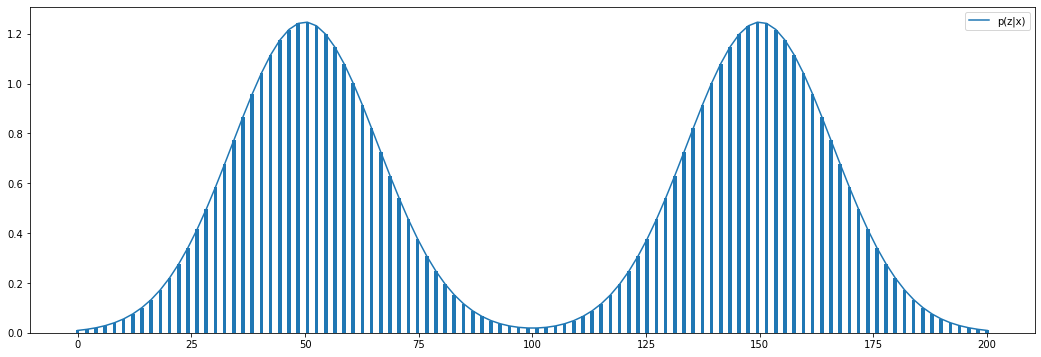

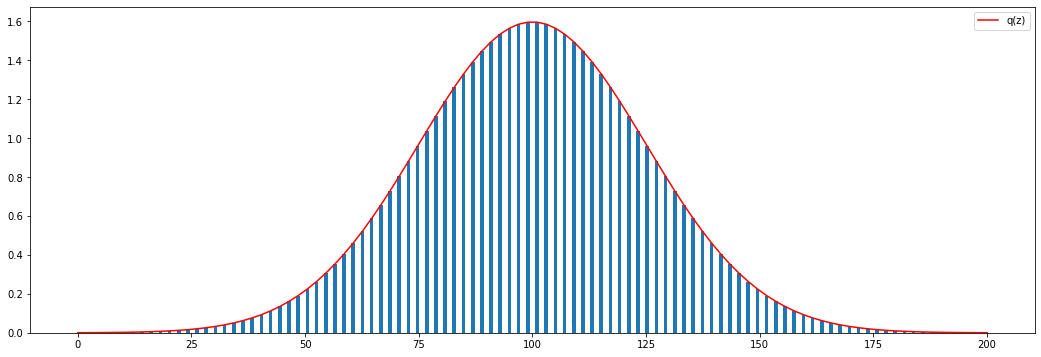

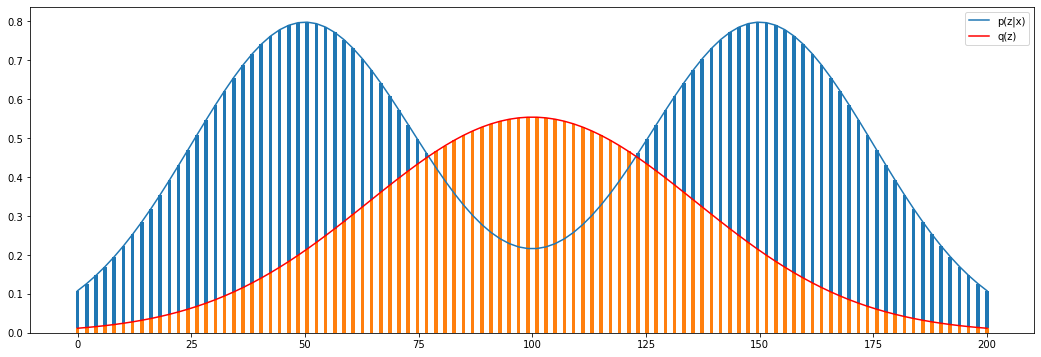

In [0]:
import scipy.stats as stats

M = 200
N = 100
x = np.linspace(0, M, M+1 >> 1)

mean1 = 150; mean2 = 50
var = 16.

plt.figure(figsize=(18,6))
p = 0.5 * N * stats.norm.pdf(x, mean1, var) + 0.5 * N * stats.norm.pdf(x, mean2, var)
plt.plot(x, p, label='p(z|x)')
plt.bar(x, p)
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
var = 25
q = N * stats.norm.pdf(x, (mean1 + mean2)/2, var)
plt.plot(x, q, 'r', label='q(z)')
plt.bar(x, q)
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
p = 0.5 * N * stats.norm.pdf(x, mean1, var) + 0.5 * N * stats.norm.pdf(x, mean2, var)
plt.plot(x, p, label='p(z|x)')
plt.bar(x, p)
var = 36
q = 0.5 * N * stats.norm.pdf(x, (mean1+mean2)/2, var)
plt.plot(x, q, 'r', label='q(z)')
plt.bar(x, q)
plt.legend()
plt.show()

#plt.plot(x, N * stats.norm.pdf(x, mean2, var))  # 
#plt.savefig('jdla_gtest_ideal.png')

---

- 今度は反対に，逆向き KLダイバージェンスを考えます。
- 上に示した前向き KL ダイバージェンスとは逆に，単峰性の分布が入力となり逆向きに下位層の信号を推論します。
- そうすると今度は $p$ の値が大きいところに意味があるので


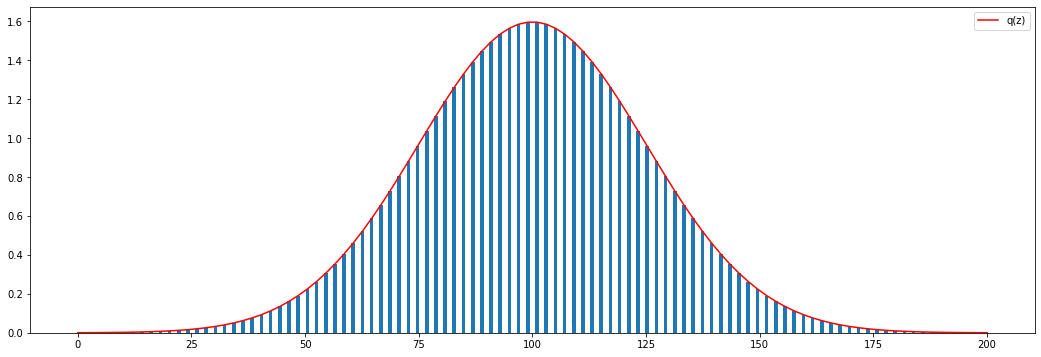

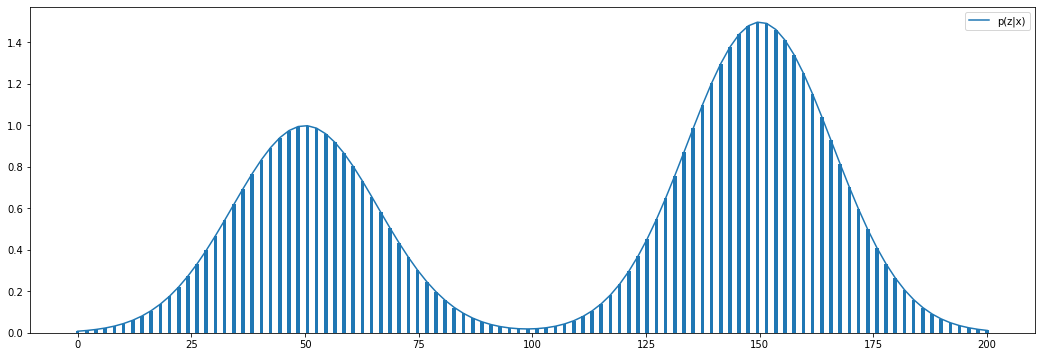

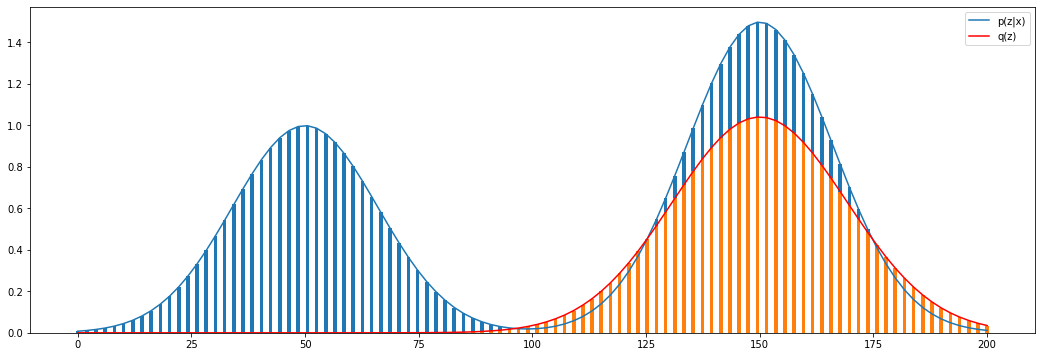

In [0]:
import scipy.stats as stats

M = 200  # 問題数
N = 100
x = np.linspace(0, M, M+1 >> 1)  # 設問数を 1 問刻みに ｘ 軸とする

plt.figure(figsize=(18,6))
var = 25
q = N * stats.norm.pdf(x, (mean1 + mean2)/2, var)
plt.plot(x, q, 'r', label='q(z)') # , fillstyle='full')
plt.bar(x, q)
plt.legend()
plt.show()

mean1 = 150; mean2 = 50
var = 16.
plt.figure(figsize=(18,6))
p = 0.6 * N * stats.norm.pdf(x, mean1, var) + 0.4 * N * stats.norm.pdf(x, mean2, var)
plt.plot(x, p, label='p(z|x)') # , fillstyle='left')
plt.bar(x, p)
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
p = 0.6 * N * stats.norm.pdf(x, mean1, var) + 0.4* N * stats.norm.pdf(x, mean2, var)
plt.plot(x, p, label='p(z|x)')
plt.bar(x, p)
q = 0.5 * N * stats.norm.pdf(x, mean1, 1.2 * var)
plt.plot(x, q, 'r', label='q(z)') 
plt.bar(x, q)
plt.legend()
plt.show()

#plt.plot(x, N * stats.norm.pdf(x, mean2, var))  # 
#plt.savefig('jdla_gtest_ideal.png')

---

以上長々とお付き合いいただきまして，ありとうございます。
フリストンの自由エネルギー原理の説明に基づいて ASD の社会的刺激の認知過程，感覚入力の推論と上位層からの感覚入力の生成モデルとを KL ダイバージェンスの 2 つ，**前向き KL ダイバージェンス** と **逆向き KL ダイバージェンス** として説明して見ました。

ご批判，ご意見などお寄せいただければ嬉しゅうございます。

